# フィルタの作成と適用
butterworthフィルタを設計します，パラメータは色々変えてみましょう

参考：[scipy.signal.butter()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html#scipy.signal.butter)

## フィルタの設計と周波数応答の観測

In [1]:
import scipy
import librosa
from pathlib import Path
from util_plots import plot_filter, plot_spectrogram_compare


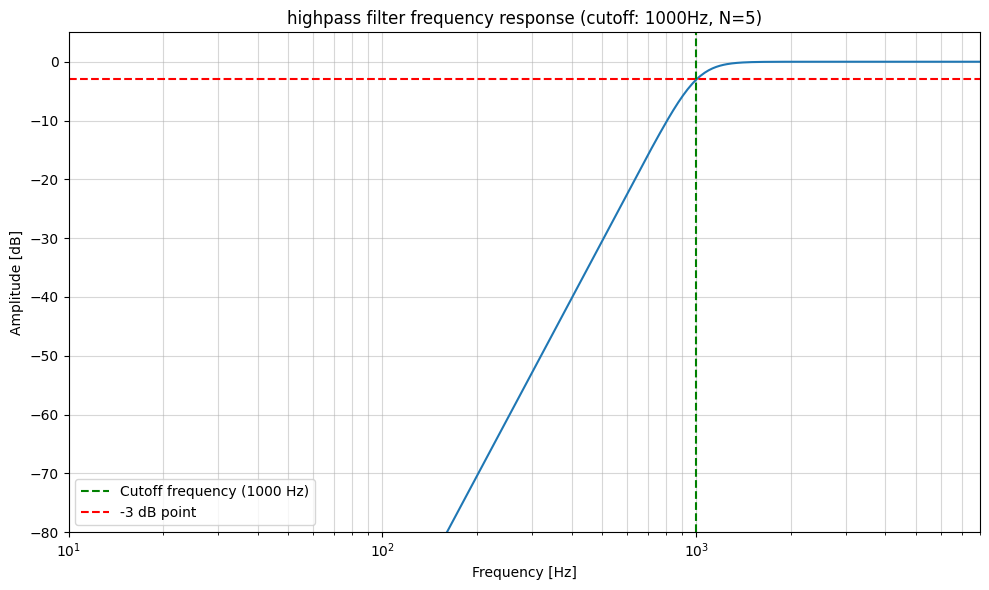

In [5]:
# サンプリング周波数
sr = 16000
nyquist = sr / 2  # ナイキスト周波数

# butterworth filter (デジタルフィルタ)
cutoff_freq = 1000  # Hz
N = 5  # フィルタ次数
btype = "highpass"
b, a = scipy.signal.butter(
    N=N, Wn=cutoff_freq, btype=btype, analog=False, fs=sr, output="ba"
)

plot_filter(b, a, N, btype, sr, cutoff_freq)

## 音声にフィルタを適用

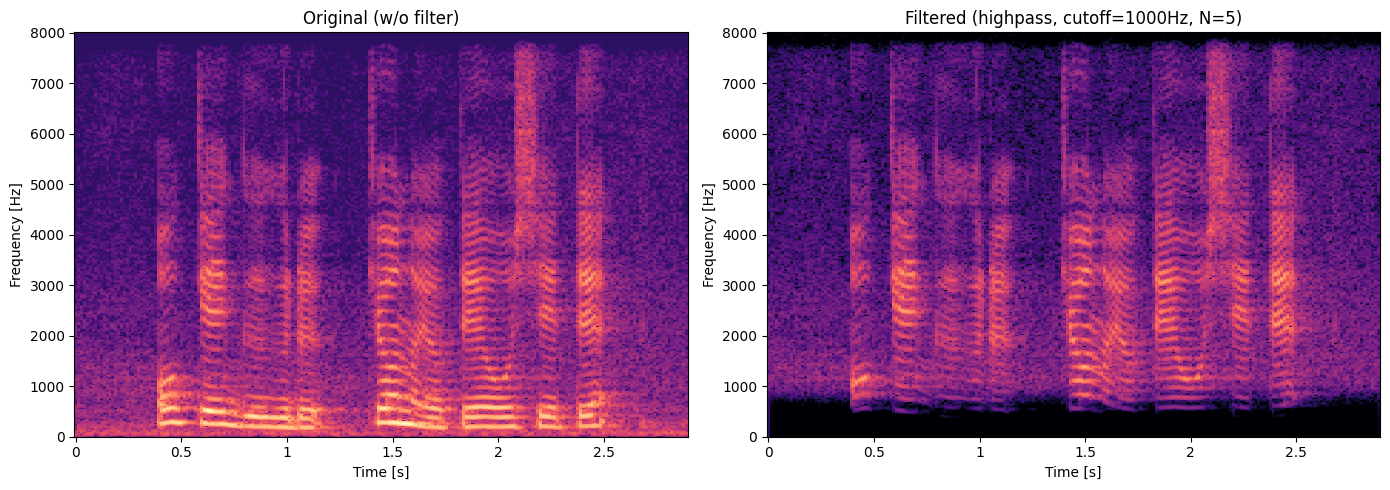

Color scale range: -96.2 dB to 0.0 dB


In [6]:
filename = "J-SPaW_sample.wav"
file_path = Path("audiofile", filename)
data, sr = librosa.load(file_path, sr=16000)

# フィルタを音声に適用
# filtfilt を使うと位相歪みなくフィルタリングできる
data_filtered = scipy.signal.filtfilt(b, a, data)

# 両方のスペクトログラムを計算してカラースケールの範囲を統一
hop_length = 216
win_length = 512
win = "hann"
n_fft = 2048
y_axis = "linear"

plot_spectrogram_compare(
    data,
    data_filtered,
    sr,
    hop_length,
    win_length,
    win,
    n_fft,
    y_axis,
    cutoff_freq,
    N,
    btype,
)

In [4]:
from IPython.display import Audio, display

# 元の音声を再生
print("元の音声:")
display(Audio(data, rate=sr))

# フィルタ適用後の音声を再生
print("\nフィルタ適用後の音声:")
display(Audio(data_filtered, rate=sr))

元の音声:



フィルタ適用後の音声:
